In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Conv2D, LSTM, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.utils import to_categorical

##Example usages for your reference

#model.add(Dense(32, activation = "relu"))
#model.compile(optimizer="Adam", loss="", metrics=[]) metrics can be "accuracy", "mse"; loss can be 'mse', 
#'binary_crossentropy', 'categorical_crossentropy'
#model.fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1)
#X_train, x_test, y_train, y_test = train_test_split(X_total, y)
#lr = LinearRegression()
#lr.fit()
#lr.predict()



Using TensorFlow backend.


## 1) Wine Problem (45 points). 

Your goal is to predict the quality score of a wine based on its characterisitcs. There are a few approaches to this problem. Let’s start by treating quality score as if it is a continuous value so we can use our old friend, linear regression.  Preprocess the data below to make it work well with linear regression and split it into train and test sets (X and Y) (5 points). 


In [75]:
wine  = pd.read_csv("winequality-red.csv", sep=";") #Modify here to read in your file

In [76]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


/Users/jguevara/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


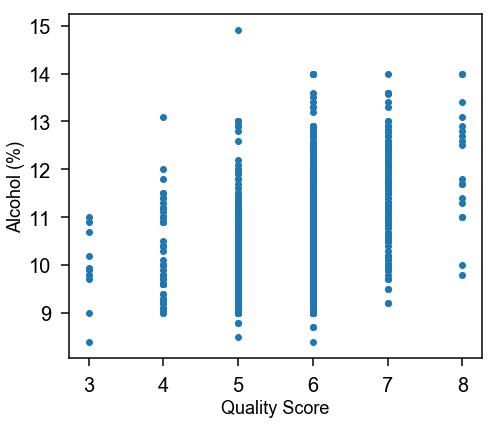

In [77]:
##additional pre-processing here
#get your data ready to run a model on 

# At a glance, one could say that a wine's quality could be based on its alcohol content so I'll check that out
plt.figure(figsize=(7,6))
Alcohol = wine['alcohol']
Quality = wine['quality']
plt.scatter(Quality, Alcohol)
plt.xlabel("Quality Score",fontsize=18)
plt.ylabel("Alcohol (%)", fontsize=18)
plt.show()

In [78]:
# Probably a good idea to check correlations
wine.corr()['quality'].sort_values(ascending=True)

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [79]:
lambda_func = lambda x: (x - x.mean())/x.std()
# I'll take the three most negative and the three most positive correlations as my numerical features since they probably have the most pull
wine_features = ["volatile acidity", "total sulfur dioxide", "density", "alcohol", "sulphates", "citric acid"]
wine[wine_features] = wine[wine_features].transform(lambda_func)
wine[wine_features].head()

,volatile acidity,total sulfur dioxide,density,alcohol,sulphates,citric acid
0,0.961576,-0.379014,0.558100,-0.959946,-0.579025,-1.391037
1,1.966827,0.624168,0.028252,-0.584594,0.128910,-1.391037
2,1.296660,0.228975,0.134222,-0.584594,-0.048074,-1.185699
3,-1.384011,0.411372,0.664069,-0.584594,-0.461036,1.483689
4,0.961576,-0.379014,0.558100,-0.959946,-0.579025,-1.391037


In [80]:
y = wine['quality']
X = wine[wine_features]

In [81]:
#print(X.shape, y.shape)
X.describe()

,volatile acidity,total sulfur dioxide,density,alcohol,sulphates,citric acid
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,1.688594e-16,2.666202e-17,2.360477e-14,7.109871e-17,6.665504e-16,-1.066481e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.277567e+00,-1.230199e+00,-3.537625e+00,-1.898325e+00,-1.935902e+00,-1.391037e+00
25%,-7.696903e-01,-7.438076e-01,-6.075656e-01,-8.661079e-01,-6.380200e-01,-9.290275e-01
50%,-4.367545e-02,-2.574163e-01,1.759533e-03,-2.092427e-01,-2.250577e-01,-5.634264e-02
75%,6.264921e-01,4.721707e-01,5.766445e-01,6.352984e-01,4.238832e-01,7.650078e-01
max,5.876138e+00,7.372847e+00,3.678904e+00,4.201138e+00,7.916200e+00,3.742403e+00


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

Now 

1) run a linear regression model, 

2) use it to make predictions on your test data

3) make a scatter plot (plt.scatter) of your predicted values vs. the actual values from your test data. 

4) Finally compute and n appropriate error score for your model on your test data so we can compare it to later versions (you can add more cells here to do this in multiple steps). 

(10 points)

In [83]:
# Build the linear regression model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
# Generate a prediction
predictions = lr.predict(X_test)

In [85]:
# Score prediction - two different methods to see how far off we are
print(mean_squared_error(y_test, predictions))
from sklearn.metrics import r2_score
print(r2_score(y_test, predictions))

0.4126684136581723
0.2913662872518642


/Users/jguevara/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


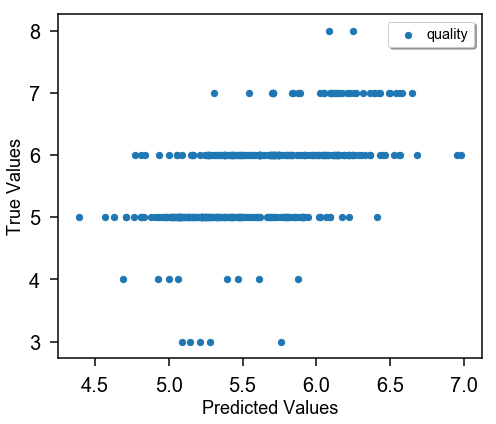

In [86]:
# Plot the predictions vs the actual values
plt.figure(figsize=(7,6))
plt.scatter(predictions, y_test, s=40)
plt.xlabel("Predicted Values", fontsize=18)
plt.ylabel("True Values", fontsize=18)
plt.legend(fontsize='x-large', frameon=True, framealpha=1.0, shadow=True)

Now try using a neural network. You can keep with the approach of treating quality score as a number so your network should spit out a real-valued number. Pass "mse" to get mean-squared error metric. Evaluate after running the model to determine if you are overfitting or not. (10 points)

In [87]:
X_train.head()

,volatile acidity,total sulfur dioxide,density,alcohol,sulphates,citric acid
1377,-0.211217,0.836964,-0.766520,1.667515,-0.225058,-0.056343
1270,-0.825538,0.411372,-3.129642,3.356597,0.541872,-1.339703
707,-0.211217,-0.287816,-0.077718,0.072271,-0.873998,-0.415683
391,-0.630072,-0.105419,2.465552,-0.396918,0.836846,2.099702
963,-1.439858,-0.591810,-0.681744,0.729136,0.187905,0.611005


In [88]:
X.head()

,volatile acidity,total sulfur dioxide,density,alcohol,sulphates,citric acid
0,0.961576,-0.379014,0.558100,-0.959946,-0.579025,-1.391037
1,1.966827,0.624168,0.028252,-0.584594,0.128910,-1.391037
2,1.296660,0.228975,0.134222,-0.584594,-0.048074,-1.185699
3,-1.384011,0.411372,0.664069,-0.584594,-0.461036,1.483689
4,0.961576,-0.379014,0.558100,-0.959946,-0.579025,-1.391037


In [99]:
# Try with no dropout
model = Sequential()
model.add(Dense(100, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(100, activation = "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(1, activation = "relu"))
model.compile(loss='binary_crossentropy', optimizer="Adam", metrics=['mean_squared_error'])
model.fit(x=X_train, y=y_train, epochs = 80, validation_data=[X_test, y_test])

Train on 1199 samples, validate on 400 samples
Epoch 1/80
1199/1199 [==============================] - 3s 3ms/step - loss: -44.1834 - mean_squared_error: 17.4325 - val_loss: -73.1357 - val_mean_squared_error: 7.1583
Epoch 2/80
1199/1199 [==============================] - 0s 221us/step - loss: -74.1673 - mean_squared_error: 6.6190 - val_loss: -73.1357 - val_mean_squared_error: 6.0990
Epoch 3/80
1199/1199 [==============================] - 0s 231us/step - loss: -74.1673 - mean_squared_error: 6.3066 - val_loss: -73.1357 - val_mean_squared_error: 6.0748
Epoch 4/80
1199/1199 [==============================] - 0s 222us/step - loss: -74.1673 - mean_squared_error: 6.2996 - val_loss: -73.1357 - val_mean_squared_error: 6.0742
Epoch 5/80
1199/1199 [==============================] - 0s 208us/step - loss: -74.1673 - mean_squared_error: 6.2995 - val_loss: -73.1357 - val_mean_squared_error: 6.0742
Epoch 6/80
1199/1199 [==============================] - 0s 209us/step - loss: -74.1673 - mean_squared_er

Epoch 49/80
1199/1199 [==============================] - 0s 214us/step - loss: -74.1673 - mean_squared_error: 6.2995 - val_loss: -73.1357 - val_mean_squared_error: 6.0742
Epoch 50/80
1199/1199 [==============================] - 0s 257us/step - loss: -74.1673 - mean_squared_error: 6.2995 - val_loss: -73.1357 - val_mean_squared_error: 6.0742
Epoch 51/80
1199/1199 [==============================] - 0s 240us/step - loss: -74.1673 - mean_squared_error: 6.2995 - val_loss: -73.1357 - val_mean_squared_error: 6.0742
Epoch 52/80
1199/1199 [==============================] - 0s 222us/step - loss: -74.1673 - mean_squared_error: 6.2995 - val_loss: -73.1357 - val_mean_squared_error: 6.0742
Epoch 53/80
1199/1199 [==============================] - 0s 223us/step - loss: -74.1673 - mean_squared_error: 6.2995 - val_loss: -73.1357 - val_mean_squared_error: 6.0742
Epoch 54/80
1199/1199 [==============================] - 0s 226us/step - loss: -74.1673 - mean_squared_error: 6.2995 - val_loss: -73.1357 - val_m

In [ ]:
#model.fit(X_train.values, y_train.values, epochs=80, validation_data=[x_test.values, y_test.values])

QUESTION: How is the neural network that you used different from linear regression? What parts are the same? Describe funtionality as well as what kinds of thing the network can learn (5 points)

The neural network that I built was supposed to take the same test and train sets that the linear regression model used. So no difference there. However, the added layers of the neural network and its backpropagation should've helped the model learn which of the features that I chose had most of an effect in predicting wine quality therefore adjusting them accordingly until our loss was at its lowest. Thoug I did not use the drop off, the mean_squared error metric did go down so it's at least promising.

QUESTION: If you were going to implement your own linear regression function instead of using the scikit learn function, what are the major components / steps you would implement? Briefly describe what your program would do. You need not be verbose, a numbered list is sufficient. (5 points)



<ul>
    <li>
<ul/>

QUESTION: If you have a neural network with 10 (single-valued) inputs, 5 units in the first layer, 3 units in the second layer, and 1 output unit, how many weights would you have total? Ignore bias terms and show your math (you don't need to provide an explanation, just show the math). (5 points)

In [101]:
total_weights = (10 * 5) + (5*3) + (3*1) # 10 inputs to each of the 5 units in the first layer, 5 inputs to each of the 3 units in the second layer, and 3 inputs to into the last layer
print("Total weights = ", total_weights)

Total weights =  68


QUESTION: We could have treated this problem as a multi-class classification problem. How would this have impacted your neural network if you treated it as a classification task? Why might it not be a good idea to do this in this case? (5 points)

### 2 - Recognizing images (35 points)

We're going to work on image recognition problem. The images you will be using come from the "Fasion MNIST" dataset that is already cataloged in Keras. Items are classified into 10 different types of fashion. 

Your objective is to design from scratch a neural network to get as high of a classification accuracy as possible. Keep in mind your dataset is small. 

I've done some of the preprocessing for you in this case to speed things up. 

In [102]:
#Loads data into test and training sets
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


/Users/jguevara/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


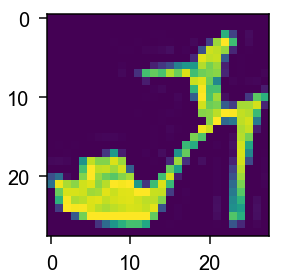

In [103]:
plt.imshow(x_train[9])

/Users/jguevara/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


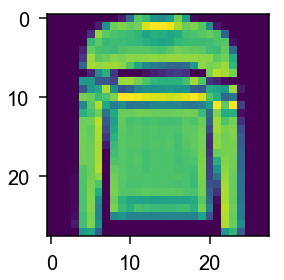

In [104]:
plt.imshow(x_train[5])

In [105]:
#creating one-hot ys
x_train = x_train.reshape((60000, 28, 28, 1))
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test.astype('float32') / 255

#one-hot encode the ys to map from indices to vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [122]:
#looking at the outputs
y_train[1:10]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

Build your network below. 

Important: build a network such that your feature map has shrunk 4x by the time you get to the end (shoudl be about 7 x 7). (20 points)

In [144]:
##your network here... shrink your feature map 4x from input
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 7, 7, 64)          36928     
Total params: 92,672
Trainable params: 92,672
Non-trainable params: 0
_________________________________________________________________


In [113]:
model.compile(loss='categorical_crossentropy',
              optimizer="Adam",
              metrics=['acc'])

In [116]:
#model.fit(x_train, y_train, epochs=2, validation_data=[x_test, y_test]) Couldn't get the model to fit

ValueError: Error when checking input: expected conv2d_1_input to have shape (100, 100, 3) but got array with shape (28, 28, 1)

QUESTION: Why does the type of neural network you chose work well for the task (image recognition)? What properties does it have that make it work well for this? (5 points)

Ideally a CNN should be able to take the individual pixel values that the image possesses and simplify them down to values that can be used to identify edges. By combining multiply layers of these filters we can then try to get a perceived output that can be determined to be, or not to be, what we desire to identify in the image.

QUESTION: If you wanted to improve performance at the task of identifying these images, what other approach would you try and why? (5 points)

### 3 - A Plan for dealing with text (20 points)

QUESTION: You are a data scientist working with the organization Donors Choose, which accepts applications for small grants from school teachers and then enables them to get crowdfunded. Imagine you were building a model to predict whether an application would get accepted or not based ONLY ON THE TEACHER'S ESSAY. The org has given you access to a dataset containing 200,000 applications and their result (funded or not funded). 

Walk through what approach you would take. You should cover: How would you encode the essay into something a computer could understand? What kind of neural network would you use? How many outputs would your neural network produce and what would they look like? How would you evaluate whether you were successful or not?

Working code is not required. 

The first thing to do would be to do start out by building a dictionary or vector of sorts that could be used on each of the essays received. Having this dictionary would allow us to have the machine find correlation between words that we'd like to see from these essays, and words that actually appear in the essays. This is to say, if we were to have a dictionary then one could score an essay based on how many times specific keywords within their essay are identified within the text itself. As for the architecture itself, I'd probably go with something along the lines of a many-to-one architecture so that we could proccure a score that corresponds to each essay presented.